In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_med=pd.read_csv('datasets/medical_history.csv')
df_dmg=pd.read_csv('datasets/demographic_details.csv')
df_train=pd.read_csv('datasets/train.csv')
df_test=pd.read_csv('datasets/test_share.csv')

In [3]:
df_test.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,SMS_received
0,7.223289e+12,5640433,2016-04-29T10:43:14Z,2016-04-29T00:00:00Z,0
1,8.632298e+14,5616091,2016-04-25T13:29:16Z,2016-04-29T00:00:00Z,1
2,4.438587e+14,5637909,2016-04-29T07:30:31Z,2016-04-29T00:00:00Z,0
3,4.179932e+13,5638018,2016-04-29T07:37:45Z,2016-04-29T00:00:00Z,0
4,3.647762e+13,5614045,2016-04-25T10:01:13Z,2016-04-29T00:00:00Z,1


In [4]:
dff=pd.merge(df_med,df_dmg,on='PatientId',how='inner')
dff=pd.merge(dff,df_test,on='PatientId',how='inner')

In [5]:
dff

,PatientId,Hipertension,Diabetes,Alcoholism,Handcap,Gender,Age,Neighbourhood,Scholarship,AppointmentID,ScheduledDay,AppointmentDay,SMS_received
0,7.223289e+12,0,0,0,0,F,46,DA PENHA,0,5640433,2016-04-29T10:43:14Z,2016-04-29T00:00:00Z,0
1,8.632298e+14,0,0,0,0,M,13,CONQUISTA,0,5616091,2016-04-25T13:29:16Z,2016-04-29T00:00:00Z,1
2,4.438587e+14,0,0,0,0,M,6,CONQUISTA,0,5637909,2016-04-29T07:30:31Z,2016-04-29T00:00:00Z,0
3,4.438587e+14,0,0,0,0,M,6,CONQUISTA,0,5676948,2016-05-09T17:01:17Z,2016-05-10T00:00:00Z,0
4,4.179932e+13,0,0,0,0,M,2,NOVA PALESTINA,0,5638018,2016-04-29T07:37:45Z,2016-04-29T00:00:00Z,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10849,4.493388e+14,0,0,0,0,M,38,RESISTÊNCIA,0,5785949,2016-06-08T07:51:33Z,2016-06-08T00:00:00Z,0
10850,5.526929e+12,0,0,0,0,M,18,RESISTÊNCIA,0,5778312,2016-06-06T15:23:10Z,2016-06-08T00:00:00Z,0
10851,5.526929e+12,0,0,0,0,M,18,RESISTÊNCIA,0,5773376,2016-06-06T07:08:36Z,2016-06-06T00:00:00Z,0
10852,2.423178e+12,0,0,0,0,F,6,RESISTÊNCIA,0,5780308,2016-06-07T07:52:47Z,2016-06-07T00:00:00Z,0


In [6]:
dff['ScheduledDay']=pd.to_datetime(dff['ScheduledDay'])
dff['AppointmentDay']=pd.to_datetime(dff['AppointmentDay'])

In [7]:
dff.isnull().sum()


PatientId         0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
Gender            0
Age               0
Neighbourhood     0
Scholarship       0
AppointmentID     0
ScheduledDay      0
AppointmentDay    0
SMS_received      0
dtype: int64

In [8]:
dff.duplicated().sum()

0

In [9]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10854 entries, 0 to 10853
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   PatientId       10854 non-null  float64            
 1   Hipertension    10854 non-null  int64              
 2   Diabetes        10854 non-null  int64              
 3   Alcoholism      10854 non-null  int64              
 4   Handcap         10854 non-null  int64              
 5   Gender          10854 non-null  object             
 6   Age             10854 non-null  int64              
 7   Neighbourhood   10854 non-null  object             
 8   Scholarship     10854 non-null  int64              
 9   AppointmentID   10854 non-null  int64              
 10  ScheduledDay    10854 non-null  datetime64[ns, UTC]
 11  AppointmentDay  10854 non-null  datetime64[ns, UTC]
 12  SMS_received    10854 non-null  int64              
dtypes: datetime64[ns, UTC](2), floa

In [10]:
dff.columns

Index(['PatientId', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'Gender', 'Age', 'Neighbourhood', 'Scholarship', 'AppointmentID',
       'ScheduledDay', 'AppointmentDay', 'SMS_received'],
      dtype='object')

In [11]:
cols=dff.columns
rcol=['PatientId','AppointmentID']
if 'PatientId' in cols:
        print('aa')

aa


In [12]:
def colsep(data,col):
    if data[col].dtypes=='datetime64[ns, UTC]':
            data[col[:-3]+'_month']=data[col].dt.month
            data[col[:-3]+'_day']=data[col].dt.day
def preprocess(data):
    data['ScheduledDay']=pd.to_datetime(data['ScheduledDay'])
    data['AppointmentDay']=pd.to_datetime(data['AppointmentDay'])
    cols=data.columns
    rcol=['PatientId','AppointmentID','ScheduledDay', 'AppointmentDay']
   # if  in cols
    for col in cols:
        if col=='ScheduledDay':
            colsep(data,col)
        if col=='AppointmentDay':
            colsep(data,col)
        
    data.drop(rcol,axis=1,inplace=True)    
    

In [13]:
preprocess(dff)

In [14]:
dff

,Hipertension,Diabetes,Alcoholism,Handcap,Gender,Age,Neighbourhood,Scholarship,SMS_received,Scheduled_month,Scheduled_day,Appointment_month,Appointment_day
0,0,0,0,0,F,46,DA PENHA,0,0,4,29,4,29
1,0,0,0,0,M,13,CONQUISTA,0,1,4,25,4,29
2,0,0,0,0,M,6,CONQUISTA,0,0,4,29,4,29
3,0,0,0,0,M,6,CONQUISTA,0,0,5,9,5,10
4,0,0,0,0,M,2,NOVA PALESTINA,0,0,4,29,4,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10849,0,0,0,0,M,38,RESISTÊNCIA,0,0,6,8,6,8
10850,0,0,0,0,M,18,RESISTÊNCIA,0,0,6,6,6,8
10851,0,0,0,0,M,18,RESISTÊNCIA,0,0,6,6,6,6
10852,0,0,0,0,F,6,RESISTÊNCIA,0,0,6,7,6,7


In [15]:
dff_train=pd.merge(df_med,df_dmg,on='PatientId',how='inner')
dff_train=pd.merge(dff_train,df_train,on='PatientId',how='inner')

In [16]:
preprocess(dff_train)

In [17]:
dff_train

,Hipertension,Diabetes,Alcoholism,Handcap,Gender,Age,Neighbourhood,Scholarship,SMS_received,No-show,Scheduled_month,Scheduled_day,Appointment_month,Appointment_day
0,1,0,0,0,F,62,JARDIM DA PENHA,0,0,No,4,29,4,29
1,1,0,0,0,F,62,JARDIM DA PENHA,0,0,No,4,29,4,29
2,0,0,0,0,M,56,JARDIM DA PENHA,0,0,No,4,29,4,29
3,0,0,0,0,M,56,JARDIM DA PENHA,0,0,No,4,29,4,29
4,0,0,0,0,F,8,PONTAL DE CAMBURI,0,0,No,4,29,4,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99485,0,0,0,0,F,41,MARIA ORTIZ,0,0,No,6,8,6,8
99486,0,0,0,0,M,2,ANTÔNIO HONÓRIO,0,0,No,6,8,6,8
99487,0,0,0,0,F,50,MARIA ORTIZ,0,1,No,4,27,6,7
99488,0,0,0,0,F,42,MARIA ORTIZ,0,1,No,5,3,6,7


In [18]:
dff_train.isnull().sum()

Hipertension         0
Diabetes             0
Alcoholism           0
Handcap              0
Gender               0
Age                  0
Neighbourhood        0
Scholarship          0
SMS_received         0
No-show              0
Scheduled_month      0
Scheduled_day        0
Appointment_month    0
Appointment_day      0
dtype: int64

In [19]:
dff_train.duplicated().sum()

6962

In [20]:
dff_train.drop_duplicates(inplace=True)

In [21]:
a=dff_train['Neighbourhood'].value_counts()

In [22]:
a>500

JARDIM CAMBURI                  True
MARIA ORTIZ                     True
RESISTÊNCIA                     True
JARDIM DA PENHA                 True
ITARARÉ                         True
                               ...  
ILHA DO BOI                    False
ILHA DO FRADE                  False
AEROPORTO                      False
ILHAS OCEÂNICAS DE TRINDADE    False
PARQUE INDUSTRIAL              False
Name: Neighbourhood, Length: 81, dtype: bool

In [23]:
a= a[a>598].index

In [24]:
len(a)

47

In [25]:
dff_train['Neighbourhood'].value_counts()>500

JARDIM CAMBURI                  True
MARIA ORTIZ                     True
RESISTÊNCIA                     True
JARDIM DA PENHA                 True
ITARARÉ                         True
                               ...  
ILHA DO BOI                    False
ILHA DO FRADE                  False
AEROPORTO                      False
ILHAS OCEÂNICAS DE TRINDADE    False
PARQUE INDUSTRIAL              False
Name: Neighbourhood, Length: 81, dtype: bool

In [26]:
dff_train['Neighbourhood']=np.where(dff_train['Neighbourhood'].isin(a),dff_train['Neighbourhood'],'Others')

In [27]:
dff_train

,Hipertension,Diabetes,Alcoholism,Handcap,Gender,Age,Neighbourhood,Scholarship,SMS_received,No-show,Scheduled_month,Scheduled_day,Appointment_month,Appointment_day
0,1,0,0,0,F,62,JARDIM DA PENHA,0,0,No,4,29,4,29
2,0,0,0,0,M,56,JARDIM DA PENHA,0,0,No,4,29,4,29
4,0,0,0,0,F,8,Others,0,0,No,4,29,4,29
5,0,0,0,0,F,8,Others,0,0,Yes,4,25,5,19
6,1,1,0,0,F,56,JARDIM DA PENHA,0,0,No,4,29,4,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99484,0,0,0,0,F,14,MARIA ORTIZ,0,0,No,6,8,6,8
99485,0,0,0,0,F,41,MARIA ORTIZ,0,0,No,6,8,6,8
99487,0,0,0,0,F,50,MARIA ORTIZ,0,1,No,4,27,6,7
99488,0,0,0,0,F,42,MARIA ORTIZ,0,1,No,5,3,6,7


In [28]:
dff_train['Neighbourhood'].nunique()

48

In [29]:
dff_train

,Hipertension,Diabetes,Alcoholism,Handcap,Gender,Age,Neighbourhood,Scholarship,SMS_received,No-show,Scheduled_month,Scheduled_day,Appointment_month,Appointment_day
0,1,0,0,0,F,62,JARDIM DA PENHA,0,0,No,4,29,4,29
2,0,0,0,0,M,56,JARDIM DA PENHA,0,0,No,4,29,4,29
4,0,0,0,0,F,8,Others,0,0,No,4,29,4,29
5,0,0,0,0,F,8,Others,0,0,Yes,4,25,5,19
6,1,1,0,0,F,56,JARDIM DA PENHA,0,0,No,4,29,4,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99484,0,0,0,0,F,14,MARIA ORTIZ,0,0,No,6,8,6,8
99485,0,0,0,0,F,41,MARIA ORTIZ,0,0,No,6,8,6,8
99487,0,0,0,0,F,50,MARIA ORTIZ,0,1,No,4,27,6,7
99488,0,0,0,0,F,42,MARIA ORTIZ,0,1,No,5,3,6,7


In [30]:
#dff_train.drop('Neighbourhood_',axis=1,inplace=True)

In [31]:
dff_train1=pd.get_dummies(dff_train,drop_first=True)

In [32]:
dff_train1

,Hipertension,Diabetes,Alcoholism,Handcap,Age,Scholarship,SMS_received,Scheduled_month,Scheduled_day,Appointment_month,...,Neighbourhood_SANTO ANDRÉ,Neighbourhood_SANTO ANTÔNIO,Neighbourhood_SANTOS DUMONT,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_VILA RUBIM,No-show_Yes
0,1,0,0,0,62,0,0,4,29,4,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,56,0,0,4,29,4,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,8,0,0,4,29,4,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,8,0,0,4,25,5,...,0,0,0,0,0,0,0,0,0,1
6,1,1,0,0,56,0,0,4,29,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99484,0,0,0,0,14,0,0,6,8,6,...,0,0,0,0,0,0,0,0,0,0
99485,0,0,0,0,41,0,0,6,8,6,...,0,0,0,0,0,0,0,0,0,0
99487,0,0,0,0,50,0,1,4,27,6,...,0,0,0,0,0,0,0,0,0,0
99488,0,0,0,0,42,0,1,5,3,6,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X=dff_train1.drop(columns=['No-show_Yes'])
y=dff_train1['No-show_Yes']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((74022, 59), (18506, 59), (74022,), (18506,))

In [38]:
import warnings as w
w.simplefilter('igonre')

AssertionError: invalid action: 'igonre'

In [36]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

C:\Users\PSK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
ypred_test=lr_model.predict(X_test)
ypred_train=lr_model.predict(X_train)
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lr_model,X,y,cv=3,scoring='accuracy')
sc_roc=cross_val_score(lr_model,X,y,cv=3,scoring='roc_auc')
print("Cross Validation",scores," means",scores.mean())
print("ROC_AUC",scores," roc",scores.mean())
print(lr_model.score(X_test,y_test))
print(lr_model.score(X_train,y_train))

C:\Users\PSK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PSK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

Cross Validation [0.78828259 0.78776384 0.7767006 ]  means 0.7842490105869843
ROC_AUC [0.78828259 0.78776384 0.7767006 ]  roc 0.7842490105869843
0.7845563600994272
0.7881710842722434


C:\Users\PSK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
w.filterwarnings('ignore')

In [41]:
import statsmodels.api as sm
X_new = sm.add_constant(X)
model = sm.Logit(y,X_new).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            No-show_Yes   No. Observations:                92528
Model:                          Logit   Df Residuals:                    92468
Method:                           MLE   Df Model:                           59
Date:                Sun, 07 May 2023   Pseudo R-squ.:                     inf
Time:                        18:22:43   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.2836      0.131     -2.167 

In [44]:
[model.summary()]

[<class 'statsmodels.iolib.summary.Summary'>
 """
                            Logit Regression Results                           
 Dep. Variable:            No-show_Yes   No. Observations:                92528
 Model:                          Logit   Df Residuals:                    92468
 Method:                           MLE   Df Model:                           59
 Date:                Sun, 07 May 2023   Pseudo R-squ.:                     inf
 Time:                        18:25:24   Log-Likelihood:                   -inf
 converged:                       True   LL-Null:                        0.0000
 Covariance Type:            nonrobust   LLR p-value:                     1.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
 -----------------------------------------------------------------------------------------------------
 const                                -0.2836      0.131     -2.167      0.030      -0.540      -0.027
 

'const                                -0.2836      0.131     -2.167      0.030      -0.540      -0.027\n Hipertension                         -0.1092      0.027     -4.011      0.000      -0.163      -0.056\n Diabetes                              0.1256      0.037      3.420      0.001       0.054       0.198\n Alcoholism                            0.2640      0.049      5.381      0.000       0.168       0.360\n Handcap                              -0.0140      0.054     -0.260      0.795      -0.119       0.091\n Age                                  -0.0070      0.000    -15.802      0.000      -0.008      -0.006\n Scholarship                           0.1454      0.027      5.329      0.000       0.092       0.199\n SMS_received                          0.3168      0.019     16.950      0.000       0.280       0.353\n Scheduled_month                      -0.7331      0.017    -42.626      0.000      -0.767      -0.699\n Scheduled_day                        -0.0159      0.001    -14.

In [54]:
ypred_train=model.
ypred_test=model.predict(X_test)

TypeError: 'numpy.float64' object is not callable

In [47]:
asd=pd.read_csv('a.csv')
asd

,coef std err z P>|z| [0.025 0.975]
0,---------------------------------------------...
1,const -0.2836 ...
2,Hipertension -0.1092 ...
3,Diabetes 0.1256 ...
4,Alcoholism 0.2640 ...
...,...
56,Neighbourhood_SÃO CRISTÓVÃO -0.2406 ...
57,Neighbourhood_SÃO JOSÉ 0.0150 ...
58,Neighbourhood_SÃO PEDRO 0.0327 ...
59,Neighbourhood_TABUAZEIRO -0.2944 ...


In [175]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
ada = AdaBoostClassifier()
gdc = GradientBoostingClassifier()

In [177]:
ada.fit(X_train,y_train)
print('Train Score',ada.score(X_train,y_train))
print('Test Scoer ',ada.score(X_test,y_test))
score_acc = cross_val_score(ada,X,y,cv=5,scoring='accuracy')
score_auc = cross_val_score(ada,X,y,cv=5,scoring='roc_auc') 
print(score_acc,'Accuracy ',score_acc.mean())
print(score_auc,'Auc_score',score_auc.mean())

Train Score 0.789603090972954
Test Scoer  0.7864476386036962
[0.78828259 0.78919042 0.77900266] Accuracy  0.7854918890581192
[0.64952972 0.65440849 0.67272421] Auc_score 0.6588874751209021


In [179]:
gdc.fit(X_train,y_train)
print('Train Score',gdc.score(X_train,y_train))
print('Test Scoer ',gdc.score(X_test,y_test))
score_acc_gdc = cross_val_score(gdc,X,y,cv=5,scoring='accuracy')
score_auc_gdc = cross_val_score(gdc,X,y,cv=5,scoring='roc_auc') 
print(score_acc_gdc,'Accuracy ',score_acc_gdc.mean())
print(score_auc_gdc,'Auc_score',score_auc_gdc.mean())

Train Score 0.7911837021426062
Test Scoer  0.7887171728088188
[0.78974387 0.78925754 0.78893332 0.78962443 0.78962443] Accuracy  0.7894367151070103
[0.65911285 0.7061266  0.68373771 0.66797362 0.72092529] Auc_score 0.6875752154273065


In [55]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
print('Train Score',xgb.score(X_train,y_train))
print('Test Scoer ',xgb.score(X_test,y_test))
score_acc_xgb = cross_val_score(xgb,X,y,cv=5,scoring='accuracy')
score_auc_xgb = cross_val_score(xgb,X,y,cv=5,scoring='roc_auc') 
print(score_acc_xgb,'Accuracy ',score_acc_xgb.mean())
print(score_auc_xgb,'Auc_score',score_auc_xgb.mean())

Train Score 0.8089486909297235
Test Scoer  0.7887712093375122
[0.77758565 0.78347563 0.78169242 0.77730343 0.78524723] Accuracy  0.7810608726970927
[0.66908824 0.71430459 0.69944422 0.67442773 0.71568679] Auc_score 0.6945903108610818


# hyperparameter

In [58]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
estimator=AdaBoostClassifier()
param_grid={'n_estimators':[1,2,4,10,15,20,30,50]}
grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [1, 2, 4, 10, 15, 20, 30, 50]},
             scoring='accuracy')

In [61]:
grid.best_params_

{'n_estimators': 1}

In [64]:
#final Adaboosting model
ada=AdaBoostClassifier(n_estimators=1)
ada.fit(X_train,y_train)
print('Train Score',ada.score(X_train,y_train))
print('Test Scoer ',ada.score(X_test,y_test))
score_acc = cross_val_score(ada,X,y,cv=5,scoring='accuracy')
score_auc = cross_val_score(ada,X,y,cv=5,scoring='roc_auc') 
print(score_acc,'Accuracy ',score_acc.mean())
print(score_auc,'Auc_score',score_auc.mean())

Train Score 0.7906027937640161
Test Scoer  0.7880146979358046
[0.79006809 0.79006809 0.79006809 0.79011078 0.79011078] Accuracy  0.7900851639637063
[0.56604264 0.59659519 0.58937297 0.58834059 0.59598183] Auc_score 0.5872666428054827


In [63]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingClassifier()
param_grid={'n_estimators':[10,20,25,26,27,30],'learning_rate':list(np.linspace(0.1,1,10).round(2))}
grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)
print(grid.best_params_)

{'learning_rate': 0.4, 'n_estimators': 30}


In [ ]:
# Final Gradientboosting
gdc=GradientBoostingClassifier(learning_rate=0.4,n_estimators=30)
gdc.fit(X_train,y_train)
print('Train Score',gdc.score(X_train,y_train))
print('Test Scoer ',gdc.score(X_test,y_test))
score_acc_gdc = cross_val_score(gdc,X,y,cv=5,scoring='accuracy')
score_auc_gdc = cross_val_score(gdc,X,y,cv=5,scoring='roc_auc') 
print(score_acc_gdc,'Accuracy ',score_acc_gdc.mean())
print(score_auc_gdc,'Auc_score',score_auc_gdc.mean())

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
estimator=XGBClassifier()
param_grid={'n_estimators':[0,1,2,3,10,20,30,35,40,50],
           'max_depth':[1,2,3,4,5,6],
            'gamma':[0,0.15,0.3,0.5,1]
           }
grid=GridSearchCV(estimator,param_grid=param_grid,cv=5,scoring='accuracy',return_train_score=True,verbose=2,n_jobs=-1,refit=True)
grid.fit(X_train,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
{'gamma': 0.15, 'max_depth': 5, 'n_estimators': 30}


In [79]:
cv= pd.DataFrame(grid.cv_results_)
cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.631206,0.015934,0.065621,0.006250,0,1,0,"{'gamma': 0, 'max_depth': 1, 'n_estimators': 0}",0.790611,0.790611,...,0.790603,0.000007,101,0.790601,0.790601,0.790604,0.790604,0.790604,0.790603,0.000002
1,0.868689,0.007654,0.074995,0.006248,0,1,1,"{'gamma': 0, 'max_depth': 1, 'n_estimators': 1}",0.790611,0.790611,...,0.790603,0.000007,101,0.790601,0.790601,0.790604,0.790604,0.790604,0.790603,0.000002
2,0.943686,0.015932,0.074994,0.006247,0,1,2,"{'gamma': 0, 'max_depth': 1, 'n_estimators': 2}",0.790611,0.790611,...,0.790603,0.000007,101,0.790601,0.790601,0.790604,0.790604,0.790604,0.790603,0.000002
3,1.059301,0.006249,0.074995,0.006250,0,1,3,"{'gamma': 0, 'max_depth': 1, 'n_estimators': 3}",0.790611,0.790611,...,0.790603,0.000007,101,0.790601,0.790601,0.790604,0.790604,0.790604,0.790603,0.000002
4,1.756127,0.023382,0.081245,0.011691,0,1,10,"{'gamma': 0, 'max_depth': 1, 'n_estimators': 10}",0.790611,0.790611,...,0.790603,0.000007,101,0.790601,0.790601,0.790604,0.790604,0.790604,0.790603,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,10.196631,0.097669,0.102350,0.008680,1,6,20,"{'gamma': 1, 'max_depth': 6, 'n_estimators': 20}",0.791354,0.791287,...,0.791265,0.000431,22,0.796241,0.795869,0.795957,0.796954,0.796042,0.796213,0.000390
296,15.122733,0.489101,0.127981,0.019913,1,6,30,"{'gamma': 1, 'max_depth': 6, 'n_estimators': 30}",0.790679,0.791354,...,0.790711,0.000559,80,0.797997,0.797828,0.797916,0.799537,0.798659,0.798388,0.000645
297,18.345209,0.366538,0.121761,0.002847,1,6,35,"{'gamma': 1, 'max_depth': 6, 'n_estimators': 35}",0.791489,0.791760,...,0.791008,0.000653,41,0.798926,0.799247,0.799149,0.800517,0.800027,0.799573,0.000600
298,20.207190,0.277935,0.142307,0.023333,1,6,40,"{'gamma': 1, 'max_depth': 6, 'n_estimators': 40}",0.791354,0.791422,...,0.790805,0.000541,75,0.800091,0.800311,0.800449,0.801733,0.801192,0.800755,0.000613


<AxesSubplot:xlabel='param_n_estimators', ylabel='mean_train_score'>

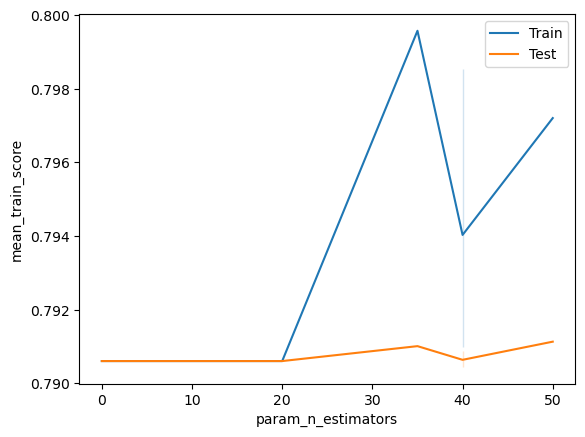

In [71]:
sns.lineplot(x='param_n_estimators',y='mean_train_score',data=cv,label='Train')
sns.lineplot(x='param_n_estimators',y='mean_test_score',data=cv,label='Test')

<AxesSubplot:xlabel='param_max_depth', ylabel='mean_train_score'>

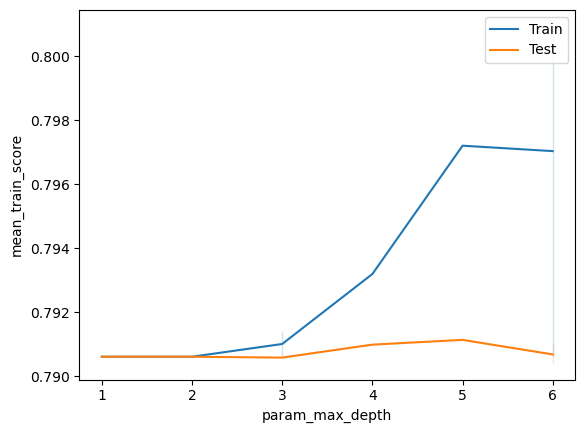

In [72]:
sns.lineplot(x='param_max_depth',y='mean_train_score',data=cv,label='Train')
sns.lineplot(x='param_max_depth',y='mean_test_score',data=cv,label='Test')

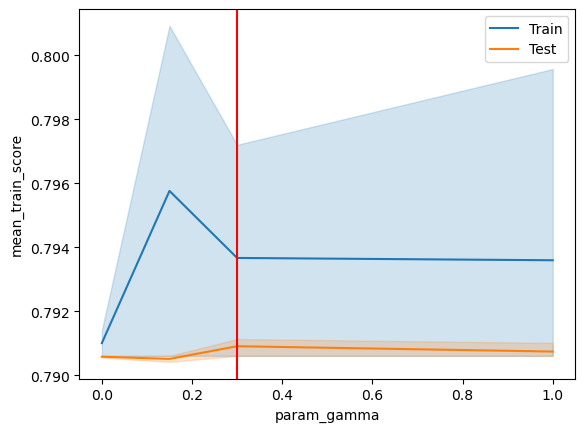

In [74]:
sns.lineplot(x='param_gamma',y='mean_train_score',data=cv,label='Train')
sns.lineplot(x='param_gamma',y='mean_test_score',data=cv,label='Test')
plt.axvline(0.3,color='red')

In [75]:
grid.best_params_,grid.best_score_

({'n_estimators': 50, 'max_depth': 5, 'gamma': 0.3}, 0.7911296443972489)

In [76]:
xgb = XGBClassifier(**grid.best_params_)
xgb1 = XGBClassifier(**{'n_estimators': 40, 'max_depth': 3, 'gamma': 0.3})
xgb.fit(X_train,y_train)
print('Train Score',xgb.score(X_train,y_train))
print('Test Scoer ',xgb.score(X_test,y_test))
score_acc_xgb = cross_val_score(xgb,X,y,cv=5,scoring='accuracy')
score_auc_xgb = cross_val_score(xgb,X,y,cv=5,scoring='roc_auc') 
print(score_acc_xgb,'Accuracy ',score_acc_xgb.mean())
print(score_auc_xgb,'Auc_score',score_auc_xgb.mean())

Train Score 0.7965604820188592
Test Scoer  0.7900680860261536
[0.78628553 0.78731222 0.78493462 0.78357201 0.78892191] Accuracy  0.7862052576885394
[0.67516749 0.71707384 0.69979388 0.67337696 0.72148006] Auc_score 0.6973784439719722


In [77]:
xgb1.fit(X_train,y_train)
print('Train Score',xgb1.score(X_train,y_train))
print('Test Scoer ',xgb1.score(X_test,y_test))
score_acc_xgb1 = cross_val_score(xgb1,X,y,cv=5,scoring='accuracy')
score_auc_xgb1 = cross_val_score(xgb1,X,y,cv=5,scoring='roc_auc') 
print(score_acc_xgb1,'Accuracy ',score_acc_xgb1.mean())
print(score_auc_xgb1,'Auc_score',score_auc_xgb1.mean())

Train Score 0.7907513982329578
Test Scoer  0.7878525883497244
[0.78893332 0.78936561 0.78887928 0.78594974 0.78930019] Accuracy  0.788485628984464
[0.66217454 0.70922059 0.68667948 0.66821795 0.71930633] Auc_score 0.6891197785894198


In [80]:

xgb = XGBClassifier(**grid.best_params_)
xgb1 = XGBClassifier(**{'gamma': 0.15, 'max_depth': 5, 'n_estimators': 30})
xgb.fit(X_train,y_train)
print('Train Score',xgb.score(X_train,y_train))
print('Test Scoer ',xgb.score(X_test,y_test))
score_acc_xgb = cross_val_score(xgb,X,y,cv=5,scoring='accuracy')
score_auc_xgb = cross_val_score(xgb,X,y,cv=5,scoring='roc_auc') 
print(score_acc_xgb,'Accuracy ',score_acc_xgb.mean())
print(score_auc_xgb,'Auc_score',score_auc_xgb.mean())

Train Score 0.7948042473859123
Test Scoer  0.7897438668539933
[0.78796066 0.78871717 0.78736626 0.7858957  0.78935423] Accuracy  0.7878588052516207
[0.67192125 0.71619758 0.694818   0.67643466 0.72246705] Auc_score 0.6963677087650696
